In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c94c2de414882947206b4f0a7f4989c8


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ust-ilimsk
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | isoka
Processing Record 7 of Set 1 | nebolchi
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | lumut
Processing Record 11 of Set 1 | tessalit
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | teya
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | guasdualito
Processing Record 16 of Set 1 | san ramon de la nueva oran
Processing Record 17 of Set 1 | broken hill
Processing Record 18 of Set 1 | yamada
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | kununurra
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1

Processing Record 38 of Set 4 | provideniya
Processing Record 39 of Set 4 | aklavik
Processing Record 40 of Set 4 | maragogi
Processing Record 41 of Set 4 | khandyga
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | bocaranga
City not found. Skipping...
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | accra
Processing Record 46 of Set 4 | santa isabel
Processing Record 47 of Set 4 | lavrentiya
Processing Record 48 of Set 4 | kuusamo
Processing Record 49 of Set 4 | high level
Processing Record 50 of Set 4 | bol
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | leirvik
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | odweyne
Processing Record 8 of Set 5 | yasothon
Processing Record 9 of Set 5 | bantry
Processing Record 10 of Set 5 | samusu
City not found. Skipping...
Processing Re

Processing Record 27 of Set 8 | belaya gora
Processing Record 28 of Set 8 | mier
Processing Record 29 of Set 8 | rioja
Processing Record 30 of Set 8 | severo-kurilsk
Processing Record 31 of Set 8 | kuanshan
City not found. Skipping...
Processing Record 32 of Set 8 | chebsara
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | sorvag
City not found. Skipping...
Processing Record 35 of Set 8 | asyut
Processing Record 36 of Set 8 | baykit
Processing Record 37 of Set 8 | toliary
City not found. Skipping...
Processing Record 38 of Set 8 | walvis bay
Processing Record 39 of Set 8 | qaqortoq
Processing Record 40 of Set 8 | terrace bay
Processing Record 41 of Set 8 | pervomayskiy
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 44 of Set 8 | moose factory
Processing Record 45 of Set 8 | pouebo
Processing Record 46 of Set 8 | miri
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set

Processing Record 15 of Set 12 | longyearbyen
Processing Record 16 of Set 12 | sakakah
Processing Record 17 of Set 12 | berdigestyakh
Processing Record 18 of Set 12 | camabatela
Processing Record 19 of Set 12 | raudeberg
Processing Record 20 of Set 12 | karaul
City not found. Skipping...
Processing Record 21 of Set 12 | srivardhan
Processing Record 22 of Set 12 | vostok
Processing Record 23 of Set 12 | tual
Processing Record 24 of Set 12 | latung
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | norden
Processing Record 27 of Set 12 | nampula
Processing Record 28 of Set 12 | potcoava
Processing Record 29 of Set 12 | vila velha
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Ilimsk,58.00,102.66,24.71,95,78,5.50,RU,2020-10-25 16:29:56
1,Ushuaia,-54.80,-68.30,48.20,57,40,5.82,AR,2020-10-25 16:20:20
2,Yellowknife,62.46,-114.35,28.40,86,75,8.05,CA,2020-10-25 16:22:23
3,Puerto Ayora,-0.74,-90.35,73.40,78,75,19.46,EC,2020-10-25 16:22:15
4,Esperance,-33.87,121.90,53.60,76,0,13.87,AU,2020-10-25 16:22:40
5,Isoka,-10.16,32.63,77.67,28,76,2.53,ZM,2020-10-25 16:29:56
6,Nebolchi,59.12,33.35,40.62,95,99,3.27,RU,2020-10-25 16:29:56
7,Jamestown,42.10,-79.24,45.00,59,90,5.82,US,2020-10-25 16:22:28
8,New Norfolk,-42.78,147.06,42.01,62,1,2.06,AU,2020-10-25 16:22:30
9,Lumut,4.23,100.63,80.01,88,20,2.24,MY,2020-10-25 16:29:57


In [12]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Ilimsk,RU,2020-10-25 16:29:56,58.00,102.66,24.71,95,78,5.50
1,Ushuaia,AR,2020-10-25 16:20:20,-54.80,-68.30,48.20,57,40,5.82
2,Yellowknife,CA,2020-10-25 16:22:23,62.46,-114.35,28.40,86,75,8.05
3,Puerto Ayora,EC,2020-10-25 16:22:15,-0.74,-90.35,73.40,78,75,19.46
4,Esperance,AU,2020-10-25 16:22:40,-33.87,121.90,53.60,76,0,13.87


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

NameError: name 'time' is not defined

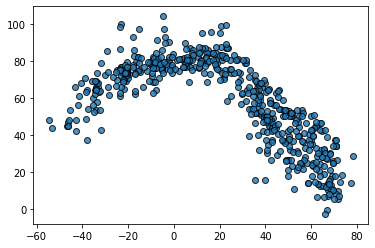

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

NameError: name 'time' is not defined

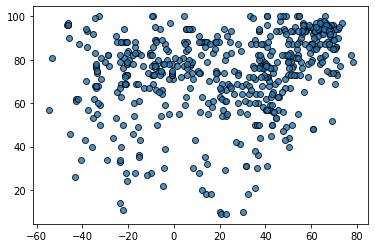

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


NameError: name 'time' is not defined

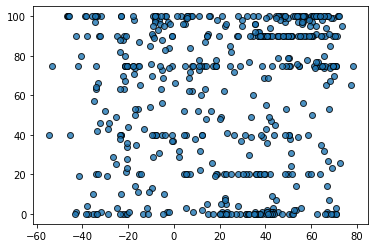

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

NameError: name 'time' is not defined

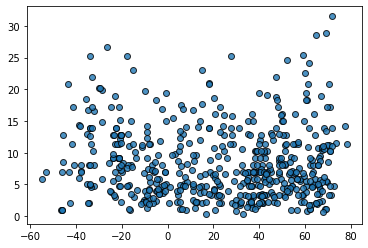

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
#Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

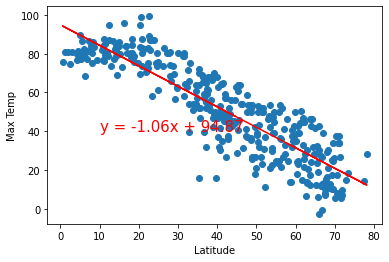

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere /n for Maximum Temperature', 'Max Temp',(10,40))

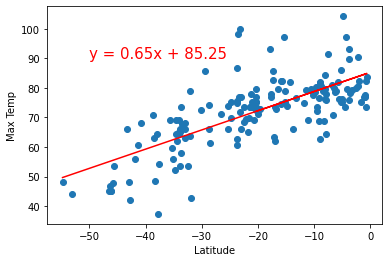

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

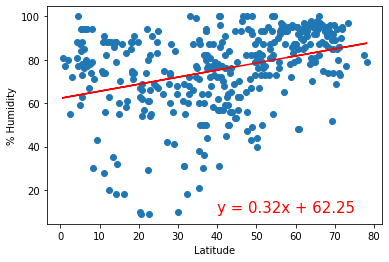

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

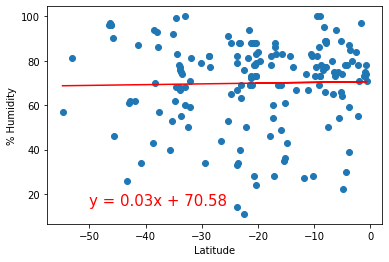

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

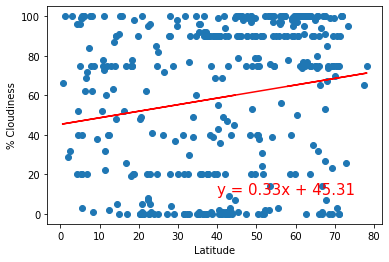

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

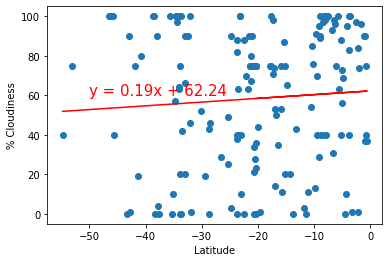

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

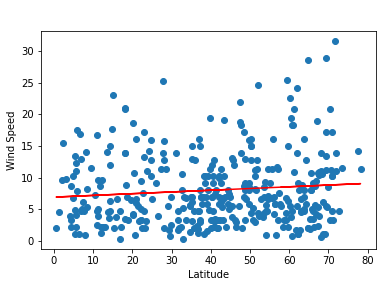

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

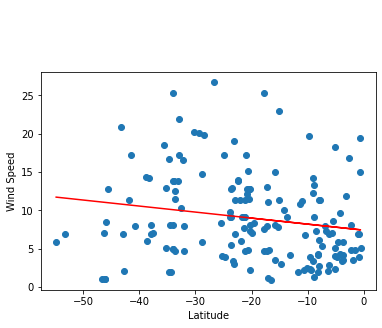

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))